In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import xgboost as xgb
import shap
from sklearn.model_selection import train_test_split
from sklearn.datasets import fetch_california_housing


In [3]:

dataset = fetch_california_housing()
df = pd.DataFrame(dataset.data, columns=dataset.feature_names)

# Add the target column
df['Target'] = dataset.target

# Optional: Separate features and target
X = df.drop('Target', axis=1)
y = df['Target']


In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [5]:
model = xgb.XGBRegressor()
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [6]:
explainer = shap.Explainer(model)
shap_values = explainer(X_test)

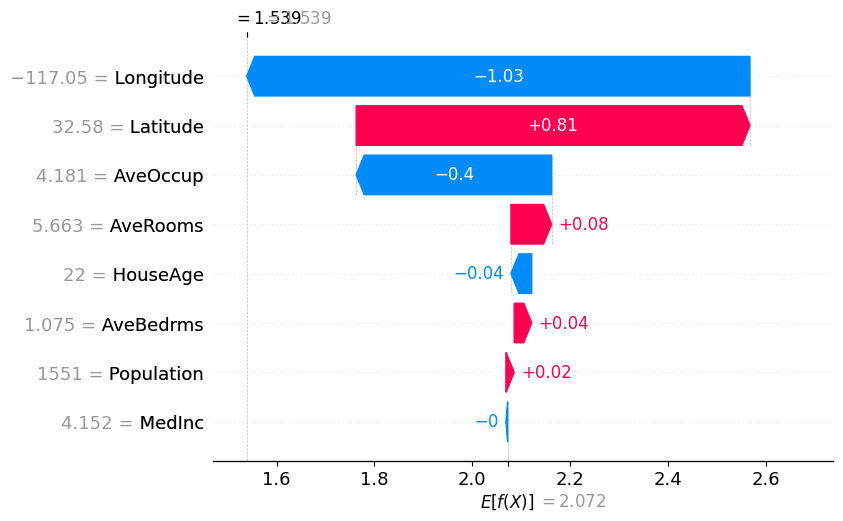

In [7]:
shap.waterfall_plot(shap_values[0])

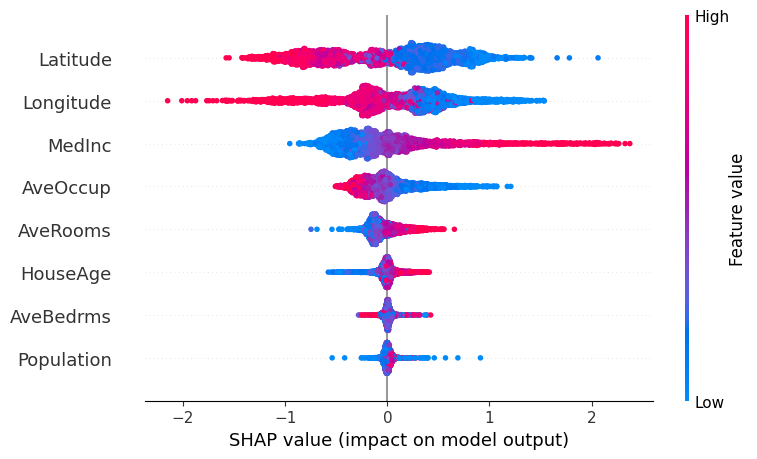

In [10]:
shap.summary_plot(shap_values, X_test)

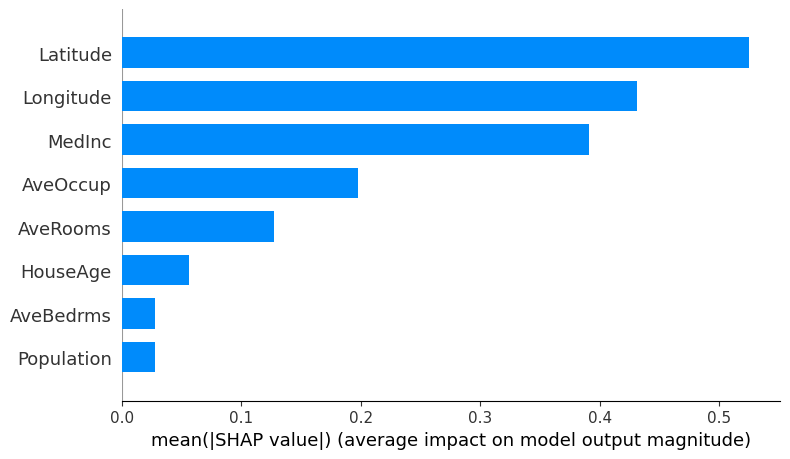

In [11]:
shap.summary_plot(shap_values, X_test, plot_type="bar")